# Case Study 5

**Assignment: Use Multiple Imputation**

* Use PROC MI to discover the missing values patterns and to decide what MI options to use. (Assume no need for transformations.)
* Use PROC MI to create multiple imputed data sets.
* Use PROC REG to analyze the multiple data sets while outputting information to be used in MIANALYZE.
* Use PROC MIANALYZE to summarize the imputed analyses.
* Compare these results to the listwise deletion results.

**Check out this tutorial**
https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

## Must submit a word doc

In [9]:
import pandas as pd
import io

data = io.StringIO("""Auto	MPG	CYLINDERS	SIZE	HP	WEIGHT	ACCEL	ENG_TYPE
Buick Estate Wagon	16.9	8	350	155	4.36	14.9	1
Ford Country Sq. Wagon	15.5	8	351		4.054	14.3	1
Chevy Malibu Wagon	19.2	8	267	125	3.605	15	1
Chrys Lebaron Wagon	18.5	8	360	150	3.94	13	1
Chevette	30	4	98	68	2.155	16.5	0
Toyota Corona	27.5	4	134	95	2.56	14.2	0
Datsun 510	27.2	4	119	97	2.3	14.7	0
Dodge Omni	30.9	4	105	75	2.23	14.5	
Audi 5000	20.3	5	131		2.83	15.9	0
Volvo 240 GL	17	6	163	125	3.14	13.6	0
Saab 99 GLE	21.6		121	115	2.795	15.7	0
Peugeot 694 SL	16.2	6		133	3.41	15.8	0
Buick Century Spec.	20.6		231	105	3.38	15.8	0
Mercury Zephyr	20.8	6	200	85		16.7	0
Dodge Aspen	18.6	6	225	110	3.62	18.7	0
AMC Concord D/L	18.1		258	120	3.41		0
Chevy Caprice Classic	17		305	130		15.4	1
Ford LTD	17.6	8	302	129	3.725		
Mercury Grand Marquis	16.5	8	351	138	3.955	13.2	1
Dodge St Regis	18.2	8	318	135	3.83		1
Ford Mustang 4	26.5	4	140		2.585	14.4	0
Ford Mustang Ghia	21.9	6	171		2.91	16.6	1
Mazda GLC	34.1	4	86	65		15.2	0
Dodge Colt	35.1	4	98	80	1.915	14.4	0
AMC Spirit	27.4	4	121		2.67	15	0
VW Scirocco	31.5	4	89	71	1.99	14.9	0
Honda Accord	29.5	4	98	68		16.6	0
Buick Skylark	28.4	4	151	90	2.67	16	0
Chevy Citation	28.8	6	173	115	2.595	11.3	1
Olds Omega	26.8	6	173	115	2.7	12.9	1
Pontiac Phoenix	33.5	4	151	90	2.556	13.2	0
Plymouth Horizon	34.2	4	105	70	2.2	13.2	0
Datsun 210	31.8	4	85	65	2.02	19.2	
Fiat Strada	37.3	4	91	69	2.13	14.7	0
VW Dasher	30.5	4		78		14.1	0
Datsun 810	22	6		97	2.815	14.5	0
BMW 320i	21.5	4	121	110			0
VW Rabbit	31.9	4	89	71	1.925	14	0""")

df = pd.read_csv(data, sep = '\t')


In [11]:
df.head(10)

,Auto,MPG,CYLINDERS,SIZE,HP,WEIGHT,ACCEL,ENG_TYPE
0,Buick Estate Wagon,16.9,8.0,350.0,155.0,4.360,14.9,1.0
1,Ford Country Sq. Wagon,15.5,8.0,351.0,NaN,4.054,14.3,1.0
2,Chevy Malibu Wagon,19.2,8.0,267.0,125.0,3.605,15.0,1.0
3,Chrys Lebaron Wagon,18.5,8.0,360.0,150.0,3.940,13.0,1.0
4,Chevette,30.0,4.0,98.0,68.0,2.155,16.5,0.0
5,Toyota Corona,27.5,4.0,134.0,95.0,2.560,14.2,0.0
6,Datsun 510,27.2,4.0,119.0,97.0,2.300,14.7,0.0
7,Dodge Omni,30.9,4.0,105.0,75.0,2.230,14.5,NaN
8,Audi 5000,20.3,5.0,131.0,NaN,2.830,15.9,0.0
9,Volvo 240 GL,17.0,6.0,163.0,125.0,3.140,13.6,0.0


## Multiple Imputation


In [13]:
import missingno as msno

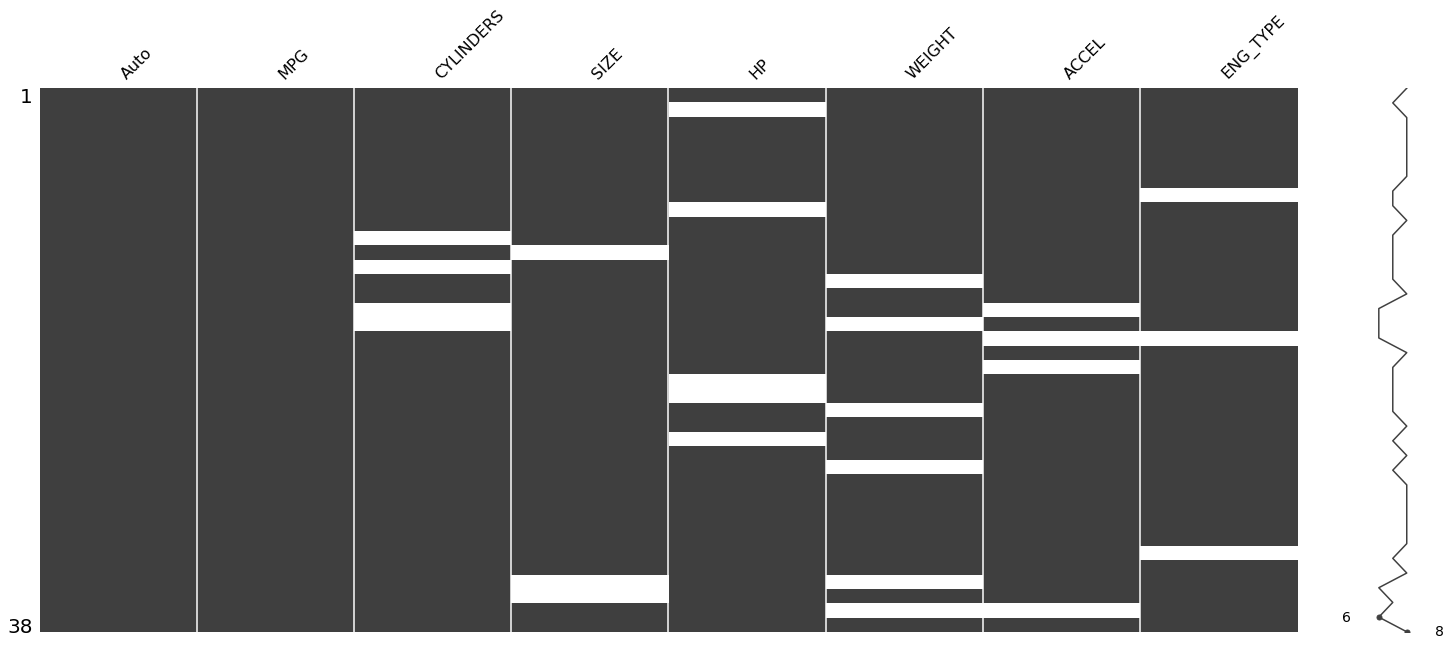

In [19]:
# Displays a visual representation of missing data
msno.matrix(df)

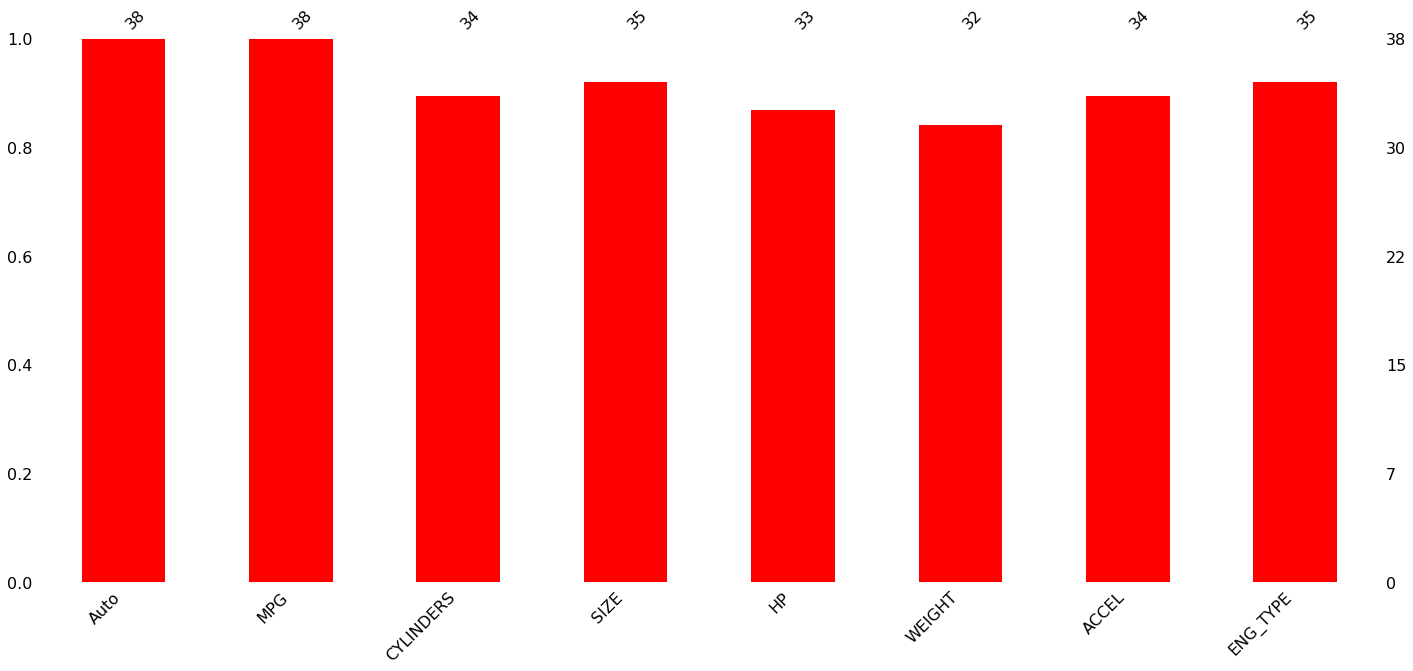

In [20]:
msno.bar(df, color='red')